# Analysis - Engagements 
## 1. Load data

In [37]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from utils.cuda_cluster import *
from utils.dataset import read_data

import core.config as conf

In [3]:
client

Client Scheduler: tcp://127.0.0.1:37381 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 1 Memory: 33.47 GB


In [105]:
# data_path = conf.raw_data_path + '*' # for all dataset
data_path = conf.raw_data_path + 'part-00175'
ori_df = read_data(data_path)

number of rows: 3033347


In [11]:
columns = [
    "reply_timestamp",
    "retweet_timestamp",
    "retweet_with_comment_timestamp",
    "like_timestamp"
]
df = ori_df[columns]

In [12]:
df.head()

,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
id,,,,
1,0,0,0,1613048460
2,0,0,0,0
3,1614019431,0,0,0
4,0,0,0,1612780118
5,0,0,0,0


## 2. Number of a certain type of engagement with respect to the total amount of engagements


In [33]:
df['is_reply'] = df['reply_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)
df['is_retweet'] = df['retweet_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)
df['is_comment'] = df['retweet_with_comment_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)
df['is_like'] = df['like_timestamp'].compute().applymap(lambda x: 1 if x > 0 else 0).astype(np.int32)

df['is_positive'] = df['is_reply'] | df['is_retweet'] | df['is_comment'] | df['is_like']
df['is_negative'] =  df['is_positive'].compute().applymap(lambda x: 1 if x == 0 else 0).astype(np.int32)

In [100]:
n_engagements = len(df)
print('The total amount of engagements : ', n_engagements)

The total amount of engagements :  3033347


Positive engagements :  1513814
Negative engagements :  1519533
Reply engagements :  90061
Rtweet engagements :  265563
Comment engagements :  21347
Like engagements :  1207792


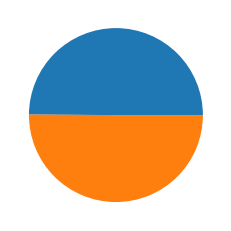

In [39]:
n_positive_engagements = df['is_positive'].compute().sum()
n_negative_engagements = df['is_negative'].compute().sum()
n_reply_engagements = df['is_reply'].compute().sum()
n_retweet_engagements = df['is_retweet'].compute().sum()
n_comment_engagements = df['is_comment'].compute().sum()
n_like_engagements = df['is_like'].compute().sum()

print('Positive engagements : ', n_positive_engagements)
print('Negative engagements : ', n_negative_engagements)
print('Reply engagements : ', n_reply_engagements)
print('Rtweet engagements : ', n_retweet_engagements)
print('Comment engagements : ', n_comment_engagements)
print('Like engagements : ', n_like_engagements)

plt.pie([n_positive_engagements, n_negative_engagements])
plt.show()

## 3. Number of rows that involves more than one engagement


In [40]:
df['number_of_engagements'] = df[['is_like', 'is_retweet', 'is_reply', 'is_comment']].sum(axis=1).astype(np.uint8)

Min number of different engagement types in a row: 0
Max number of different engagement types in a row: 4
Mean number of different engagement types in a row: 0.5224469867773123


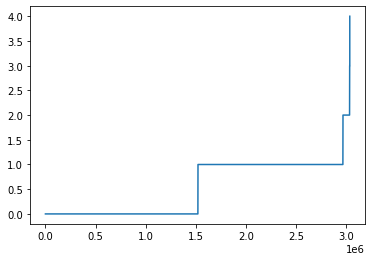

In [59]:
computed_number_of_engagements = df['number_of_engagements'].compute()

print(f"Min number of different engagement types in a row: {computed_number_of_engagements.min()}")
print(f"Max number of different engagement types in a row: {computed_number_of_engagements.max()}")
print(f"Mean number of different engagement types in a row: {computed_number_of_engagements.mean()}")

# Plotting the result
plt.clf()
plt.plot(sorted(computed_number_of_engagements.to_array()))
plt.show()


Rows with 0 engagements are 1519533 (50.0943%)
Rows with 1 engagements are 1445066 (47.6393%)
Rows with 2 engagements are 66574 (2.1947%)
Rows with 3 engagements are 2147 (0.0708%)
Rows with 4 engagements are 27 (0.0009%)


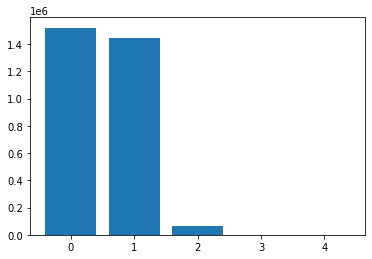

In [103]:
engagements_value_count = computed_number_of_engagements.value_counts()

idx = []
values = []
for i in range(5):
    idx.append(i)
    values.append(engagements_value_count[i])
    print(f"Rows with {i} engagements are {engagements_value_count[i]:n} ({engagements_value_count[i]/n_engagements*100:.4f}%)")

# Plotting the result
plt.bar(idx, values)
plt.show()

## 4. Let's do the same thing for each language


In [107]:
ori_df.columns

Index(['text_ tokens', 'hashtags', 'tweet_id', 'present_media',
       'present_links', 'present_domains', 'tweet_type', 'language',
       'tweet_timestamp', 'engaged_with_user_id',
       'engaged_with_user_follower_count', 'engaged_with_user_following_count',
       'engaged_with_user_is_verified', 'engaged_with_user_account_creation',
       'enaging_user_id', 'enaging_user_follower_count',
       'enaging_user_following_count', 'enaging_user_is_verified',
       'enaging_user_account_creation', 'engagee_follows_engager',
       'reply_timestamp', 'retweet_timestamp',
       'retweet_with_comment_timestamp', 'like_timestamp'],
      dtype='object')

In [ ]:

df['language'] = ori_df[]
